In [9]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline

CRIT_VAL = 0.04301
dataset1 = pd.read_csv('dataset1.txt', header=None)
dataset1 = np.array(sorted(list(dataset1[0])))

In [19]:
n_rnd = st.norm()
xs = np.linspace(n_rnd.ppf(0.001), n_rnd.ppf(0.999), num=1000)
y_real = n_rnd.cdf(xs)

def empirical_data(data, xs):
    empirical_data = np.empty_like(xs)
    for i, x in enumerate(xs):
        empirical_data[i] = np.count_nonzero(data <= x)
    return empirical_data / data.shape[0]
    
def check_hypothesis(random):
    data = np.sort(random.rvs(size=xs.shape[0]))
    check_hypothesis_with_data(data)
    
def check_hypothesis_with_data(data):
    y_emp = get_empirical_data(data, xs)
    draw_plot(xs, y_emp, y_real)
    compare_data(xs, y_emp, y_real)

def draw_plot(xs, y_emp, y_real):
    plt.plot(xs, y_real)
    plt.plot(xs, y_emp)
    plt.xlabel('x')
    plt.ylabel('p')
    plt.legend(['Real', 'Empirical'])
    
def compare_data(xs, y_emp, y_real):
    d = np.max(np.abs(y_emp - y_real))
    print(('Reject' if d > CRIT_VAL else 'Accept'))
    print('d = {}'.format(d))

Reject
d = 0.612975009018205


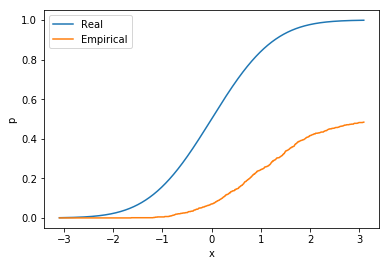

In [20]:
check_hypothesis_with_data(dataset1)

Accept
d = 0.03588497123328149


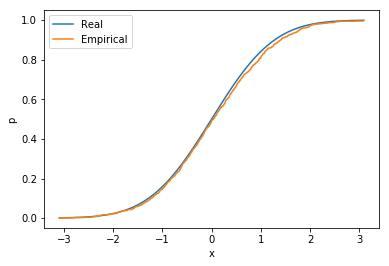

In [21]:
check_hypothesis(st.norm())

Reject
d = 0.05362418006914286


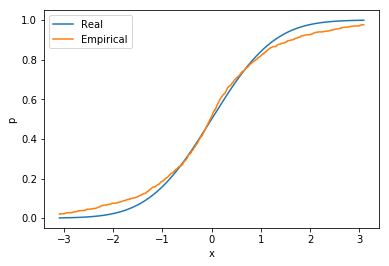

In [22]:
check_hypothesis(st.laplace())

Reject
d = 0.061653669525849664


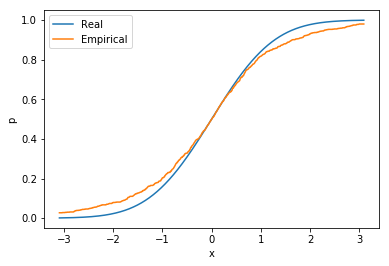

In [23]:
check_hypothesis(st.t(df=3))

Reject
d = 0.5314610804306507


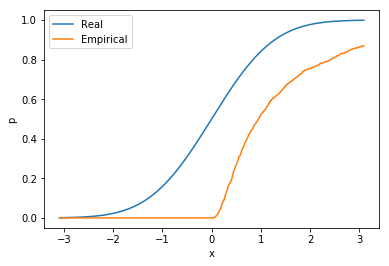

In [24]:
check_hypothesis(st.lognorm(s=1.))